In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\Users\MARCELO\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# Representação de Dados

## Kraemer

In [2]:
columns = ['1','2','3','4','5']

data = [
    [79.0, 57.0, 60.0, 66.9, 92.8, 62.7, 72.8, 91.0, 79.0, 83.0, 83.1],
    [89.2, 68.9, 68.0, 68.7, 96.5, 73.1, 76.8, 96.0, 81.3, 90.4, 90.5],
    [83.5, 65.4, 61.7, 64.8, 93.8, 56.0, 67.4, 84.2, 76.0, 84.5, 84.4],
    [83.5, 58.0, 59.9, 71.2, 87.4, 57.3, 63.4, 79.3, 73.3, 84.2, 84.3],
    [80.3, 56.5, 60.7, 66.7, 92.2, 67.7, 73.1, 91.3, 79.1, 82.8, 82.9],
]

df = pd.DataFrame(np.transpose(data), columns=columns)

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5')]

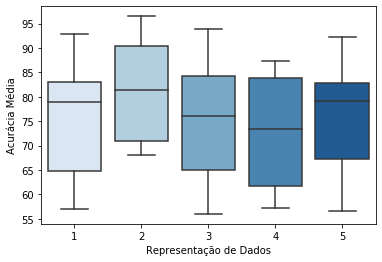

In [4]:
ax = sns.boxplot(data=data, palette='Blues')
ax.set(xlabel='Representação de Dados', ylabel='Acurácia Média')
ax.set_xticklabels(columns, rotation=0)

#fig = ax.get_figure()
#fig.savefig("boxplot_representacao_dados.pdf")

In [10]:
# n0 => hipotese nula (vem de distribuicao normal)
# nA => nao vem de distribuicao normal

alpha = 0.05
for i in df.columns:
    a, b = stats.shapiro(df[[i]])
    print('Stats', a, 'p-value', b)

    if b < alpha:
        print('null hyp can be rejected')
    else:
        print('null hypo cannot be rejected')

Stats 0.943334698677063 p-value 0.5604581236839294
null hypo cannot be rejected
Stats 0.8826534748077393 p-value 0.11242392659187317
null hypo cannot be rejected
Stats 0.9232016801834106 p-value 0.3462148904800415
null hypo cannot be rejected
Stats 0.8830311298370361 p-value 0.11366711556911469
null hypo cannot be rejected
Stats 0.9524951577186584 p-value 0.6759597063064575
null hypo cannot be rejected


In [6]:
#Henze-Zirkler multivariate normality test

import pingouin as pg

pg.multivariate_normality(df, 0.05)

HZResults(hz=0.8360701765023368, pval=0.10093709661489542, normal=True)

In [9]:
# Friedman

stats.friedmanchisquare(data[0],data[1],data[2],data[3],data[4],data[5])

#p-value < 0.05 => CAN BE REJECT NULL HYPOT (The mean for each population is equal), then The mean for each population IS NOT EQUAL

# A representação dos dados tem significancia estatistica na acurácia.

FriedmanchisquareResult(statistic=23.498659517426304, pvalue=0.00027095884491751585)

In [12]:
df.describe()

,1,2,3,4,5
count,11.000000,11.000000,11.000000,11.000000,11.000000
mean,75.209091,81.763636,74.700000,72.890909,75.754545
std,12.266658,11.187160,12.168813,11.614168,11.815021
min,57.000000,68.000000,56.000000,57.300000,56.500000
25%,64.800000,71.000000,65.100000,61.650000,67.200000
50%,79.000000,81.300000,76.000000,73.300000,79.100000
75%,83.050000,90.450000,84.300000,83.850000,82.850000
max,92.800000,96.500000,93.800000,87.400000,92.200000


# RESULTADOS SAM KNN

In [12]:
columns = ['1', '2','3']

data = [
    [86.4375,85.125,61.0625,85.375,79.625,63.25,88.5,87.5,56.71875,85.4375,57.16666667,61.5625,86.875,67.29166667,59.25,86.9375,57.58333333,55.53125,88.125,78.375,84.78125,86.8125,86,59.59375,87.875,87.625,59.65625,86.375,84.20833333,66.53125],
    [93.125,100,92.4375,100,95.375,100,91.8125,100,94,100,93.1875,100,92.5625,100,95.5625,100,93.6875,100,95.5625,100],
    [16.0625,13.3125,13.6875,16.375,13.4375,0,15.5,13.5,0,15.6875,13.3125,14,15.5625,13.5625,14.3125,15.625,13.5,14,15.3125,13.4375,14.25,16.8125,0,0,15.5,13.375,14.375,16,13.75,14.125]
]

df = pd.DataFrame(np.transpose(data), columns=columns)

C:\Users\MARCELO\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


ValueError: Shape of passed values is (3, 1), indices imply (3, 3)

[Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '3')]

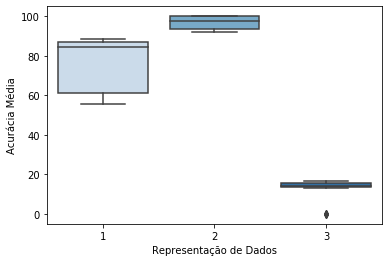

In [13]:
ax = sns.boxplot(data=data, palette='Blues')
ax.set(xlabel='Representação de Dados', ylabel='Acurácia Média')
ax.set_xticklabels(columns, rotation=0)

#fig = ax.get_figure()
#fig.savefig("boxplot_representacao_dados.pdf")